# HomeVision  - TakeHome - Data Analysis

The goal here is to create a model that predicts the closing price (ClosePrice) of a home based on the provided data set of home listings and home sales.

For each sold property, the ClosePrice column will be populated with the price that the property sold for. There are a variety of other columns in this dataset, but the columns that I'd like to focus on are:

- BathsTotal
- BedsTotal
- CDOM (Cumulative Days on Market)
- LotSizeAreaSQFT
- SqFtTotal
- ElementarySchoolName

Use whatever model or approach you think makes sense, then we will discuss the approach in the interview itself. Feel free to include “TODO:” comments if there are things that you might want to address but that would take too much time for this exercise 

**NOTES:**

- When I said 
    - "training" cases, there are cases with not null `ClosePrice `
    - "eval" or "evaluation" cases, there are cases with null `ClosePrice`
- I've splitted the data into train/eval to find out some insights
- For quantitative-discrete columns, it is usually used: barplots and normalized comparison (value_counts with %)
- For quantitative-continuous columns, it is usually used: hist, kde box and violin plots.


In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [327]:
# read data from raw csv
data = pd.read_csv('../data/raw/home-listings-example.csv')
print(data.shape,)
data.describe(include='all')

(653, 250)


,NumberOfTanksAndPonds,ListingFinancing,AccessoryUnitType,AccessoryUnitYN,AcresBottomLand,AcresCultivated,AcresIrrigated,AcresPasture,AGExemptionYN,AppFeePayableTo,...,TitleCompanyLocation,TitleCompanyPhone,Topography,TransactionType,UnexemptTaxes,UnitNumber,Utilities,UtilitiesOther,VariableFeeYN,WasherDryerConnections
count,0.0,223,6,107,0.0,0.0,0.0,0.0,0.0,0.0,...,490,409,0.0,653,424.000000,2.000000,652,0.0,653,0.0
unique,NaN,6,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,303,194,NaN,2,NaN,NaN,129,NaN,2,NaN
top,NaN,Conventional,Other,False,NaN,NaN,NaN,NaN,NaN,NaN,...,Frisco,972-335-7844,NaN,For Sale,NaN,NaN,"City Sewer, City Water",NaN,False,NaN
freq,NaN,164,4,104,NaN,NaN,NaN,NaN,NaN,NaN,...,29,21,NaN,641,NaN,NaN,144,NaN,581,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9690.702830,1702.000000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6544.632459,281.428499,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1449.000000,1503.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5967.500000,1602.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7962.000000,1702.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11339.000000,1801.500000,NaN,NaN,NaN,NaN


In [328]:

# discard other columns just for requirement of the exercise
data = data[
    [
        "BathsTotal",
        "BedsTotal",
        "CDOM",
        "LotSizeAreaSQFT",
        "SqFtTotal",
        "ElementarySchoolName",
        "ClosePrice",
    ]
]



In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BathsTotal            653 non-null    float64
 1   BedsTotal             653 non-null    int64  
 2   CDOM                  653 non-null    int64  
 3   LotSizeAreaSQFT       652 non-null    float64
 4   SqFtTotal             653 non-null    int64  
 5   ElementarySchoolName  653 non-null    object 
 6   ClosePrice            223 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 35.8+ KB


In [330]:
# summary stats
data.describe(include='all')

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice
count,653.000000,653.000000,653.000000,652.000000,653.000000,653,2.230000e+02
unique,NaN,NaN,NaN,NaN,NaN,27,NaN
top,NaN,NaN,NaN,NaN,NaN,Vaughn,NaN
freq,NaN,NaN,NaN,NaN,NaN,80,NaN
mean,3.055896,3.894334,98.110260,8039.425583,3186.044410,NaN,4.273260e+05
std,1.027811,0.843333,113.590604,5508.539660,1290.991135,NaN,1.973822e+05
min,1.000000,1.000000,-62.000000,0.000000,850.000000,NaN,1.850000e+05
25%,2.100000,3.000000,18.000000,5662.800000,2165.000000,NaN,3.000000e+05
50%,3.000000,4.000000,62.000000,7405.200000,3007.000000,NaN,3.730000e+05
75%,4.000000,5.000000,138.000000,9147.600000,3931.000000,NaN,4.805000e+05


In [331]:
data.sample(15)

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice
400,5.1,5,149,8015.04,3961,Jim Spradley,NaN
88,2.1,3,75,5662.80,2548,Christie,NaN
430,3.0,4,52,7100.28,2484,Allen,485000.0
79,3.1,4,42,4356.00,2887,Vaughn,NaN
186,5.2,5,174,9670.32,4733,Spears,NaN
230,2.0,3,110,8712.00,2211,Rogers,NaN
34,3.0,4,91,2613.60,2243,Spears,NaN
13,2.1,2,12,3049.20,1558,Spears,NaN
199,2.1,4,81,3484.80,2123,Shawnee,NaN
397,4.0,5,6,9583.20,3561,Rogers,NaN


In [332]:
data["IsEval"] = data.ClosePrice.isna()

df_train = data[~data.IsEval]
df_eval = data[data.IsEval]
df_train.shape, df_eval.shape


((223, 8), (430, 8))

## Analysis over each column

### BathsTotal
BathsTotal is the sum between BathsFull and BathsHalf, 2 + 1 => 2.1

VarType: quantitative, discrete, float
    it should be two int columns
Values: between 1 and 7 (Full) and between 0 to 4 (Half)

**Analysis**
- should be splitted int columns, but it is float due to python
    current format: `full.half`
- not nulls
- there aren't any house with more than equal 6 full baths in the training set
- there aren't any house with more than equal 3 half baths in the training set
- the relation between eval and training for full it is `35%/65% +/-5` between 2 and 4 (see value counts below) 
- the relation from 0 to 2 of half baths for training and eval  is `35/65% +/-5`


**Recommendation**
- split the column in two
    - I know that the dataset has these columns not merged, just for the exercise
- add a column to sum up these two values as "BathsTotals".

In [337]:
data["BathsFull"] = data.BathsTotal.astype(int)
data["BathsHalf"] = data.BathsTotal.astype(str).str.split('.').str[1].astype(int)

data["BathsTotal"] = data[["BathsFull", "BathsHalf"]].sum(axis=1)

In [338]:
# Check not nulls
data.BathsFull.isna().sum(), data.BathsHalf.isna().sum()

(0, 0)

<AxesSubplot: xlabel='BathsHalf', ylabel='count'>

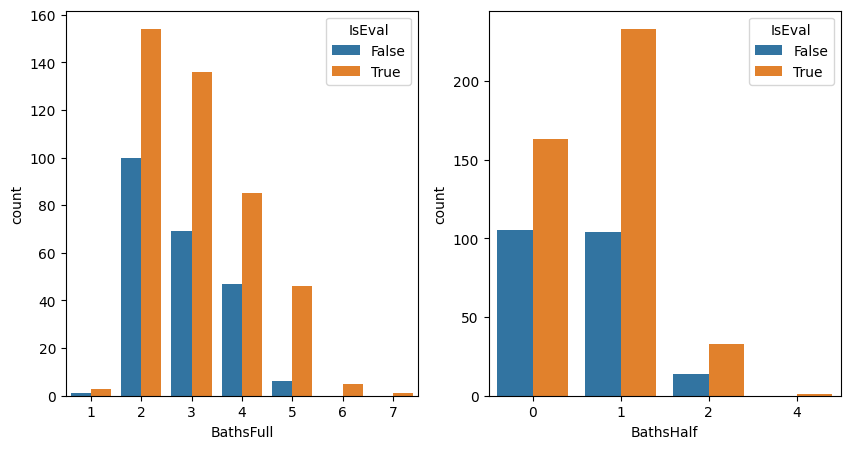

In [339]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=data, x="BathsFull", hue="IsEval", ax=ax1)
sns.countplot(data=data, x="BathsHalf", hue="IsEval", ax=ax2)

In [340]:
baths_total = data[["IsEval", "BathsFull"]].value_counts().unstack(level=0)

# percentage between training and evaluation per BathsTotal
baths_total.divide(baths_total.sum(axis=1), axis=0)


IsEval,False,True
BathsFull,,
1,0.250000,0.750000
2,0.393701,0.606299
3,0.336585,0.663415
4,0.356061,0.643939
5,0.115385,0.884615
6,NaN,1.000000
7,NaN,1.000000


In [341]:
baths_total = data[["IsEval", "BathsHalf"]].value_counts().unstack(level=0)

# percentage between training and evaluation per BathsTotal
baths_total.divide(baths_total.sum(axis=1), axis=0)

IsEval,False,True
BathsHalf,,
0,0.391791,0.608209
1,0.308605,0.691395
2,0.297872,0.702128
4,NaN,1.000000


### BedsTotal

VarType: quantitative, discrete, int  
Values: between 1 and 6

**Analysis**
- correct data type
- not nulls
- distribution between 2 and 3 seems to be equals among train/eval
- it is a bit higher when it is more than 4
- there are not 6 BedsTotal in the training, so it means that any house with that information was sold

<AxesSubplot: xlabel='BedsTotal', ylabel='count'>

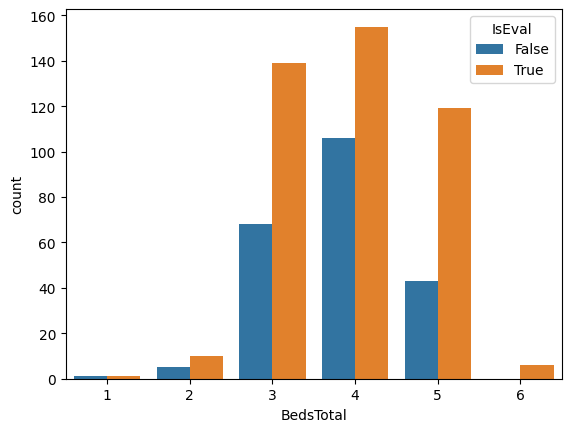

In [342]:
sns.countplot(data=data, x="BedsTotal", hue="IsEval")

In [343]:
beds_total = data[["IsEval", "BedsTotal"]].value_counts().unstack(level=0)

# percentage between training and evaluation per BedsTotal
beds_total.divide(beds_total.sum(axis=1), axis=0)

IsEval,False,True
BedsTotal,,
1,0.500000,0.500000
2,0.333333,0.666667
3,0.328502,0.671498
4,0.406130,0.593870
5,0.265432,0.734568
6,NaN,1.000000


### CDOM

"Cumulative Days on Market" generally is the number of days that a property has been active on the market, and may include brief periods that the property is removed from the market by the seller.

[Ref](https://www.redfin.com/definition/cumulative-dayson-market)

VarType: quantitative, continuous

**Analysis:**
- there are negative numbers, assuming that are typo mistakes we transform it to positive numbers
    - In a real situation, I will recommend check the frontend-backend to find out the bug.
    
- there are some zero's, it seems to be correct for evaluation data. 
    - for training, it seems to be weird but not impossible

- skewness: 
    - asymetric to the right for eval and training
- kurtosis: 
    - leptokurtic, just information.

- mean and std are different between train/eval.
    - std is a bit higher for eval, it results in a more peak kde graph for training

- there are many outliers for eval data.
    - it seems to be ok, because (for some reason) these houses continue without being sold.

- Recommendation: 
    - try to transform this variable into a normal one, some models (like trees) are affected by it
        - take into account to not have "data leaks", e.g. training a normalizer with eval data
    - add column "how far are from mean", perhaps it helps (std)
    - add one-hot with some labels if there are (e.g. recently-posted, old-posted)  


**TODO's**
- make some stats test to compare distributions (t-test, mann–whitney u test, chi-squared test, kolmogorov-smirnov test)
- develop unit tests that to ensure that these differences are maintained.


<!-- # skew=0: symmetric
# skew>0: asymmetric to the right
# skew<0: asymmetric to the left

# kurtosis<3 platykurtic: JUST INFORMATION
# kurtosis=3 mesokurtic: JUST INFORMATION
# kurtosis>3 leptokurtic: JUST INFORMATION -->

In [345]:
data.CDOM.describe()
#note data in negative, that is not valid number...

count    653.000000
mean      98.110260
std      113.590604
min      -62.000000
25%       18.000000
50%       62.000000
75%      138.000000
max      862.000000
Name: CDOM, dtype: float64

In [346]:
# there are 3 values lower than zero
data[data.CDOM <= 0][["CDOM", "ClosePrice"]]

,CDOM,ClosePrice
44,0,NaN
309,0,NaN
379,0,NaN
523,-6,345000.0
540,-62,367990.0
556,0,390220.0
576,-13,420250.0


In [347]:
# make positive these negative numbers
data.loc[data.CDOM < 0, ["CDOM"]] = data[data.CDOM < 0][["CDOM"]] * -1

<AxesSubplot: xlabel='CDOM', ylabel='Count'>

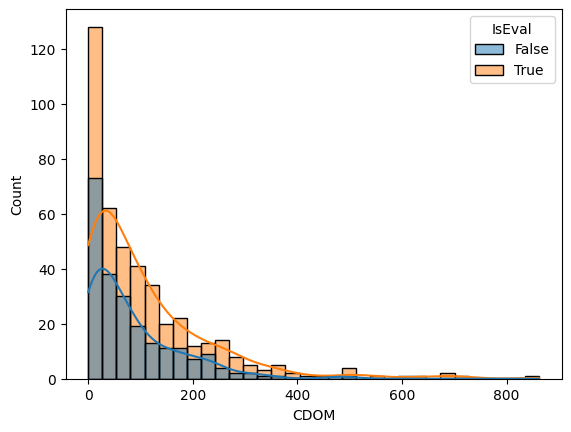

In [348]:
sns.histplot(data=data, x="CDOM", hue='IsEval', kde=True)

<AxesSubplot: xlabel='CDOM', ylabel='Density'>

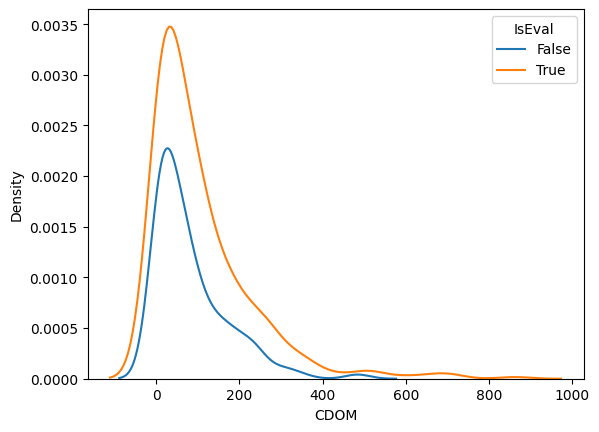

In [349]:
sns.kdeplot(data=data, x="CDOM", hue='IsEval')

In [ ]:
data[['CDOM', 'IsEval']].groupby(['IsEval']).agg(['mean', 'median', 'std', 'skew', pd.DataFrame.kurtosis])

CDOM                                       
              mean median         std      skew      kurt
IsEval                                                   
False    82.044843   55.0   87.035706  1.721406  3.681751
True    106.818605   69.0  124.119198  2.361508  7.669878

<AxesSubplot: xlabel='CDOM', ylabel='IsEval'>

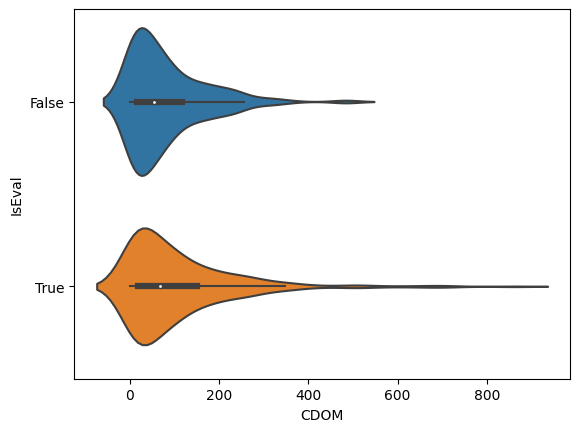

In [ ]:
sns.violinplot(data=data, x="CDOM", y='IsEval', orient='h')

<AxesSubplot: xlabel='CDOM', ylabel='IsEval'>

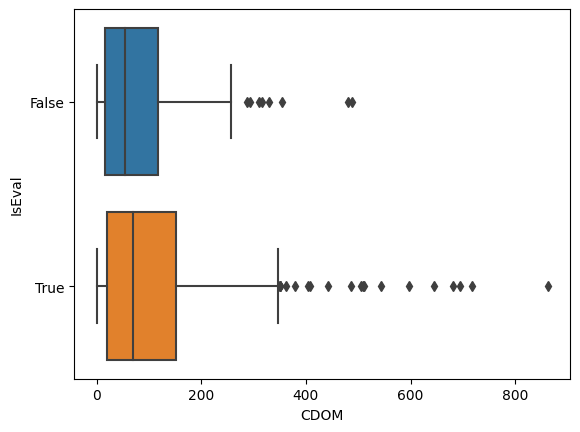

In [ ]:
sns.boxplot(data=data, x="CDOM", y='IsEval', orient='h')

### LotSizeAreaSQFT
"Lot Size Area in Square Feet"

VarType: quantitative, continuous

**Analysis:**
- just one case in eval dataset with NA, perhaps it is an error
- distributions look very similar.
- many high outliers for evaluation. 
    - it sounds correctly, due to the complexity to sell not common big houses
- Some rows have LotSizeAreaSQFT==zero, 

**Recommendation:**


**TODOs**
- null treatment for the column
- same for CDOM

In [ ]:
data.LotSizeAreaSQFT.describe()

count      652.000000
mean      8039.425583
std       5508.539660
min          0.000000
25%       5662.800000
50%       7405.200000
75%       9147.600000
max      65383.560000
Name: LotSizeAreaSQFT, dtype: float64

In [350]:
data.loc[data.LotSizeAreaSQFT.isna()]

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice,IsEval,BathsFull,BathsHalf
309,3,4,0,NaN,3007,Tadlock,NaN,True,3,0


In [351]:
data[['LotSizeAreaSQFT', 'IsEval']].groupby(['IsEval']).agg(['mean', 'median', 'std', 'skew', pd.DataFrame.kurtosis])


LotSizeAreaSQFT                                          
                  mean  median          std      skew       kurt
IsEval                                                          
False      7775.753004  7405.2  4160.052158  2.749149  18.467527
True       8176.486154  7405.2  6092.827049  3.737965  25.197590

<AxesSubplot: xlabel='LotSizeAreaSQFT', ylabel='Count'>

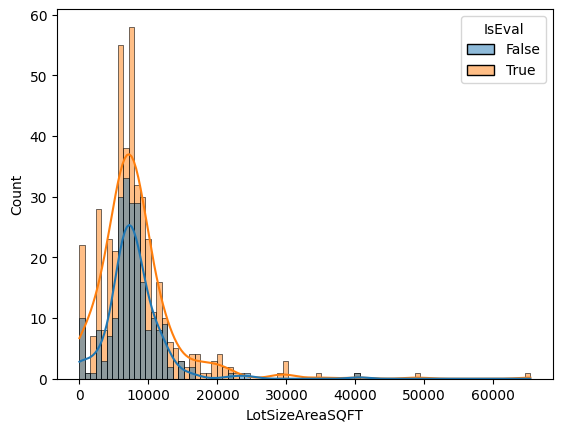

In [352]:
sns.histplot(data=data, x="LotSizeAreaSQFT", hue='IsEval', kde=True)

<AxesSubplot: xlabel='LotSizeAreaSQFT', ylabel='Density'>

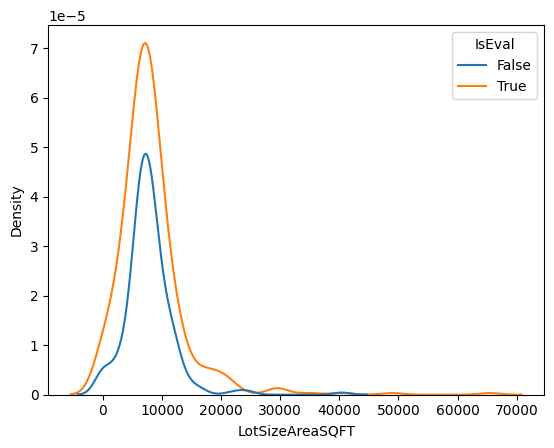

In [353]:
sns.kdeplot(data=data, x="LotSizeAreaSQFT", hue='IsEval')

<AxesSubplot: xlabel='LotSizeAreaSQFT', ylabel='IsEval'>

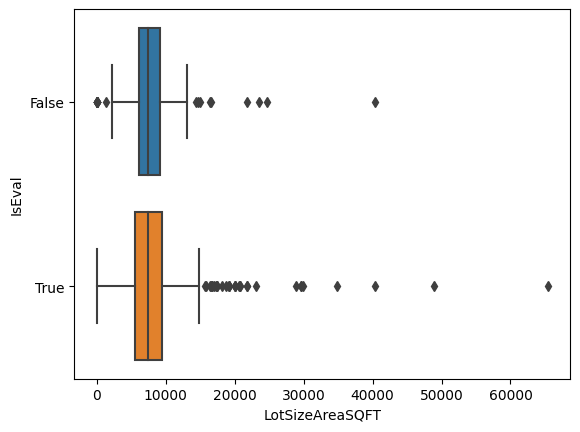

In [354]:
sns.boxplot(data=data, x="LotSizeAreaSQFT", y='IsEval', orient='h')

In [355]:
data[data.LotSizeAreaSQFT==0].describe(include='all')

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice,IsEval,BathsFull,BathsHalf
count,32.000000,32.000000,32.000000,32.0,32.000000,32,10.000000,32,32.000000,32.000000
unique,NaN,NaN,NaN,NaN,NaN,4,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Bright,NaN,True,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19,NaN,22,NaN,NaN
mean,3.781250,3.843750,252.781250,0.0,3218.812500,NaN,439866.400000,NaN,3.343750,0.437500
std,1.039056,0.919655,179.834285,0.0,867.759237,NaN,98250.246461,NaN,0.970845,0.504016
min,2.000000,2.000000,4.000000,0.0,1694.000000,NaN,340000.000000,NaN,2.000000,0.000000
25%,3.000000,3.000000,106.500000,0.0,2826.750000,NaN,351497.500000,NaN,2.750000,0.000000
50%,4.000000,4.000000,231.500000,0.0,3179.000000,NaN,398450.000000,NaN,3.500000,0.000000
75%,5.000000,5.000000,356.500000,0.0,3925.000000,NaN,541500.000000,NaN,4.000000,1.000000


In [ ]:
data[(data.SqFtTotal - data.LotSizeAreaSQFT)<=0]

,BathsTotal,BedsTotal,CDOM,LotSizeAreaSQFT,SqFtTotal,ElementarySchoolName,ClosePrice,IsEval
0,2,3,111,4573.80,2460,Vaughn,NaN,True
1,4,4,2,5837.04,3418,Vaughn,NaN,True
2,5,5,70,34848.00,8093,Hicks,NaN,True
3,1,2,13,4356.00,1122,Rogers,NaN,True
4,1,1,10,1306.80,884,Bright,NaN,True
...,...,...,...,...,...,...,...,...
648,4,4,39,12153.24,4758,Carroll,950000.0,False
649,4,4,58,16465.68,4140,Spears,970000.0,False
650,4,5,166,11717.64,7891,Carroll,1225000.0,False
651,4,5,16,23565.96,5805,Spears,1485000.0,False


### SqFtTotal
Square Feet Total

**Analysis:**
- there are many high outliers for evaluation set
    - it sounds correct, due the complexity to sell big houses
- there are not zero and not null values

**Recommendation:**
- try to normalize the column
- add a column that refers to "outlier" (perhaps helps)

**TODOs**
- same as other continuous columns above

In [ ]:
data.SqFtTotal.describe()

count     653.000000
mean     3186.044410
std      1290.991135
min       850.000000
25%      2165.000000
50%      3007.000000
75%      3931.000000
max      9222.000000
Name: SqFtTotal, dtype: float64

In [ ]:
data[['SqFtTotal', 'IsEval']].groupby(['IsEval']).agg(['mean', 'median', 'std', 'skew', pd.DataFrame.kurtosis])

SqFtTotal                                         
               mean  median          std      skew      kurt
IsEval                                                      
False   2932.551570  2760.0  1084.846573  0.958627  1.808153
True    3317.506977  3132.0  1368.672078  1.213994  2.258169

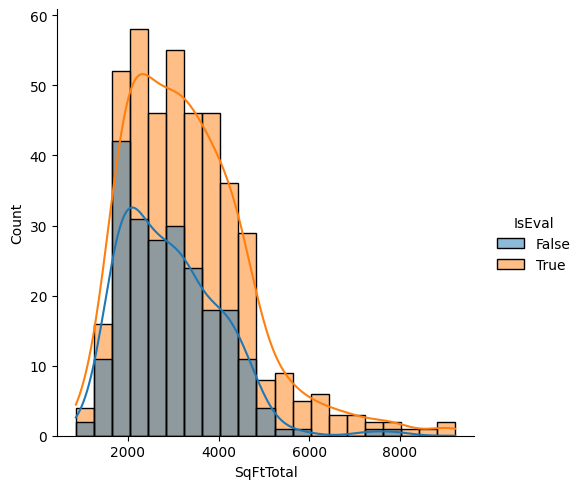

In [ ]:
sns.displot(data=data, x="SqFtTotal", hue='IsEval', kde=True)

<AxesSubplot: xlabel='LotSizeAreaSQFT', ylabel='Density'>

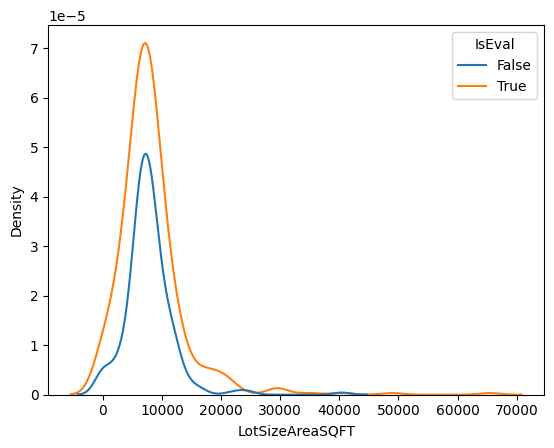

In [ ]:
sns.kdeplot(data=data, x="LotSizeAreaSQFT", hue='IsEval')

<AxesSubplot: xlabel='SqFtTotal', ylabel='IsEval'>

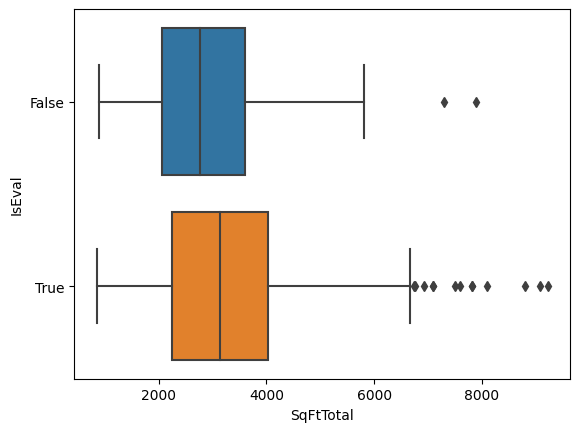

In [ ]:
sns.boxplot(data=data, x="SqFtTotal", y='IsEval', orient='h')

### ElementarySchoolName

VarType: qualitative, categorical
**Analysis:**
- 27 schools
- `Anderson, Boon, Hicks, Jim and Betty Hughes, Phillips` are not present in the training set
- `Elliott, Liscano, Lucille Rogers Ashley` are not present in the eval set


**Recommendation:**
- transform it using one-hot
    - add column "others" and gather other categories with lower cardinality

**TODO's:**
- out of hometake: get the distance to the school.

In [ ]:
data.ElementarySchoolName.describe()

count        653
unique        27
top       Vaughn
freq          80
Name: ElementarySchoolName, dtype: object

In [ ]:
data_schools = data.groupby('IsEval').ElementarySchoolName.value_counts().unstack(level=0)
data_schools

IsEval,False,True
ElementarySchoolName,,
Allen,1.0,3.0
Anderson,NaN,1.0
Boon,NaN,3.0
Bright,25.0,47.0
Carroll,12.0,26.0
Christie,14.0,30.0
Elliott,1.0,NaN
Fisher,6.0,1.0
Gunstream,15.0,17.0


In [ ]:
# these cases are not present in train or eval sets
data_schools[data_schools.isna().sum(axis=1).astype(bool)]

IsEval,False,True
ElementarySchoolName,,
Anderson,NaN,1.0
Boon,NaN,3.0
Elliott,1.0,NaN
Hicks,NaN,1.0
Jim and Betty Hughes,NaN,1.0
Liscano,1.0,NaN
Lucille Rogers Ashley,1.0,NaN
Phillips,NaN,2.0


<AxesSubplot: xlabel='count', ylabel='ElementarySchoolName'>

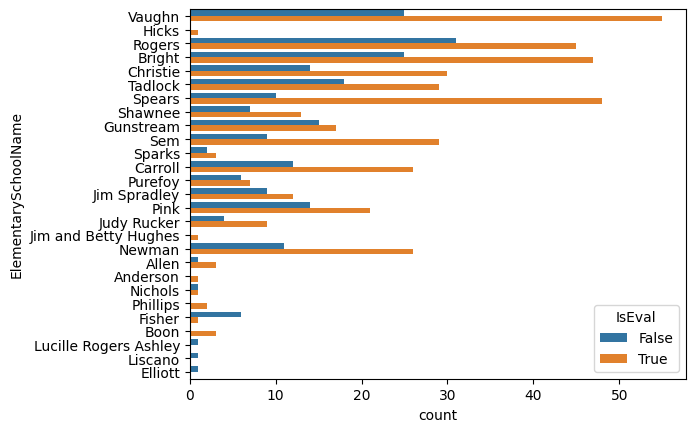

In [ ]:
sns.countplot(data=data, y='ElementarySchoolName', hue='IsEval')

In [ ]:
# Relation with ClosePrice
sns.countplot(data=data, y='ElementarySchoolName', hue='IsEval')

### ClosePrice

<!-- While leptokurtosis refers to greater outlier potential, mesokurtosis and platykurtosis describe lesser outlier potential. Mesokurtic distributions have kurtosis near 3.0, meaning that their outlier character is similar to that of the normal distribution. Platykurtic distributions have kurtosis less than 3.0, thus exhibiting less kurtosis than a normal distribution. -->

**Analysis**
- tail to the right
- thin or peak 

**Recommendation:**
- its an option to normalize
- use a metric that pushish large errors


In [ ]:
data['ClosePrice'].describe().apply(lambda x: format(x, 'f'))


count        223.000000
mean      427325.950673
std       197382.161201
min       185000.000000
25%       300000.000000
50%       373000.000000
75%       480500.000000
max      1622500.000000
Name: ClosePrice, dtype: object

In [ ]:
data['ClosePrice'].agg(['mean', 'median', 'std', 'skew', pd.DataFrame.kurtosis])

mean      427325.950673
median    373000.000000
std       197382.161201
skew           2.596683
kurt          10.022068
Name: ClosePrice, dtype: float64

<AxesSubplot: xlabel='ClosePrice'>

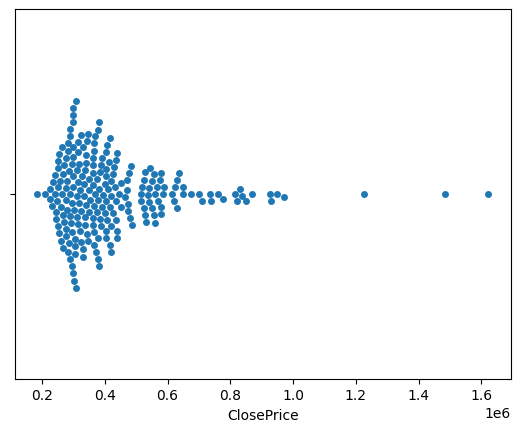

In [ ]:
sns.swarmplot(data=data, x='ClosePrice')

<AxesSubplot: xlabel='ClosePrice'>

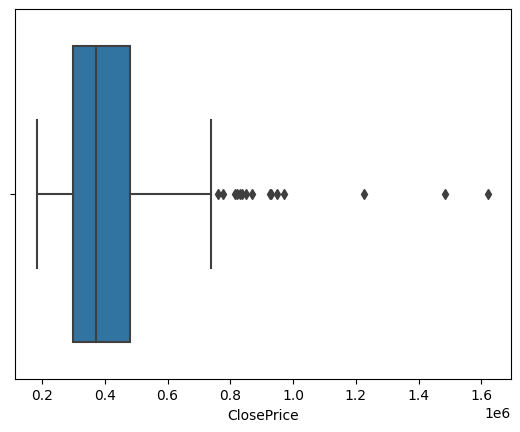

In [ ]:
sns.boxplot(data=data, x="ClosePrice")

<AxesSubplot: xlabel='ClosePrice', ylabel='Count'>

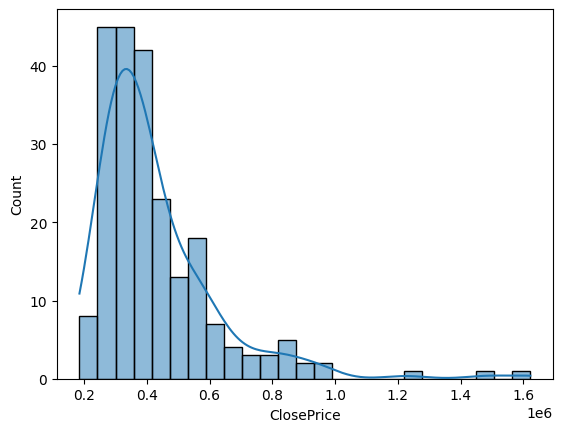

In [ ]:
sns.histplot(data=data, x="ClosePrice", kde=True)


## Summary



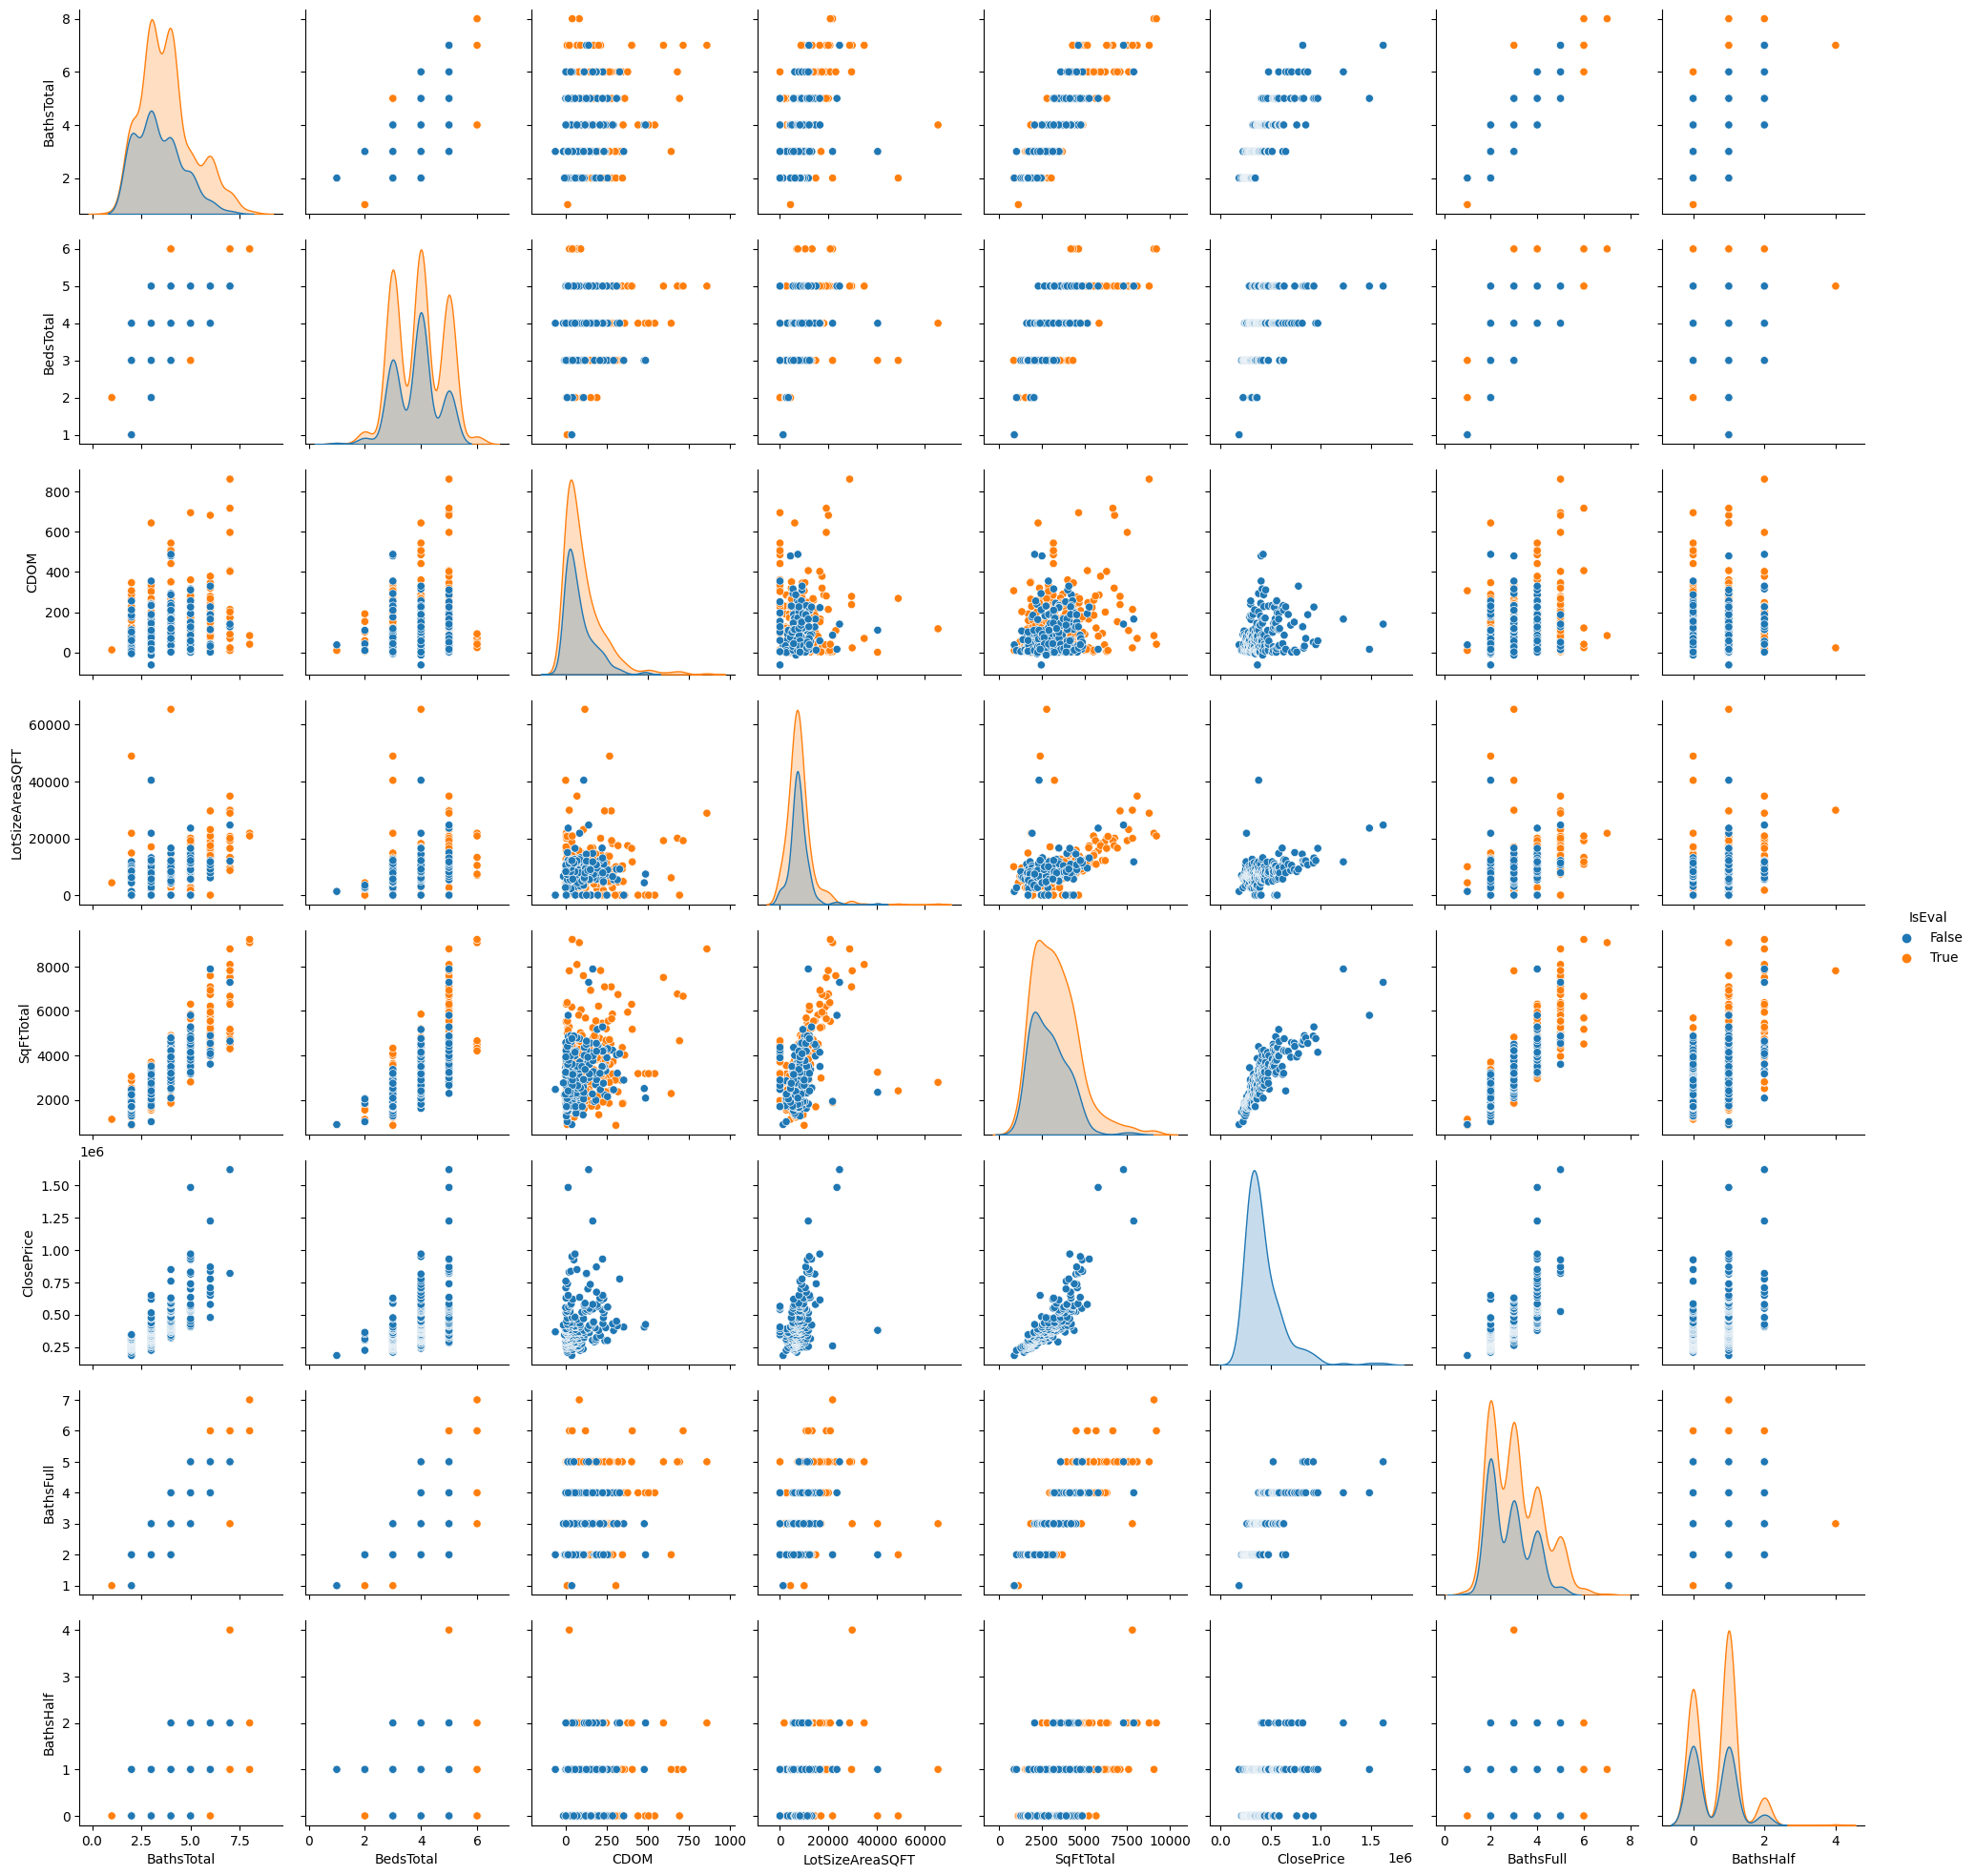

In [344]:
sns.pairplot(data, hue="IsEval")

- SqFtTotal vs ClosePrice: it looks like linear relation
- BathsTotal and BedsTotal vs ClosePrice: it looks like a linear relation
- other variables: 
    - when the house is bigger in many characteristics (Baths, Beds, LotSize and Total) it is more difficult to sell (it is more time on the market)
- Try different types of normalization for the features, it may helps.
- there are difference between data with ClosePrice and without it. 
    - it may be challenging to train a model that predicts these closing prices. 
    - it sounds that the model could be not accurate.


**Data Pipeline**
- split BathsTotal in BathFull and BathHalf 
- update BathsTotal to be BathFull + BathsHalf
- make positive CDOM values
- normalize CDOM values
- normalize between 0 and 1, not -1 to 1
- add column "CDOM_mean_diff"
- ratio CDOM/sqft
- impute LotSizeAreaSQFT NA's with 0
- add column "SqFtTotal - LotSizeAreaSQFT" >0 and  <= 0
- add ratio LotSizeAreaSQFT/SqFtTotal
- normalize SqFtTotal
- one-hot ElementarySchoolName and add default category for ElementarySchoolName (not listed)
  - for categories cardinality less than 5(?), add it to the default column
- It could be an option to normalize prices (check it)
